## Problem:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


Bad key text.latex.preview in file C:\Users\Sankara Rao\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Sankara Rao\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Sankara Rao\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality para

# 1. Read the data as an appropriate Time Series data and plot the data.

#### Read the data as a monthly Time Series from the '.csv' file.

In [2]:
#Read the data 
df_sparkling = pd.read_csv('Sparkling.csv')
df_rose = pd.read_csv('Rose.csv')

## Here we will create a separate date range and then add it to the data instead of parsing the dates

In [3]:
print('Data set for Sparkling Wine')
print(df_sparkling.head())
print('\n')
print('Data set for Rose Wine')
print(df_rose.head())

Data set for Sparkling Wine
  YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471


Data set for Rose Wine
  YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0


In [4]:
#Sparkling wine
print('Converting Sparkling Wine sale Time range in Year-Month-Day formant')
date_sparkling = pd.date_range(start='1/1/1980', periods=len(df_sparkling), freq='M')
print(date_sparkling)
print('\n')
#Rose wine
print('Converting Rose Wine sale Time range in Year-Month-Day formant')
date_rose = pd.date_range(start='1/1/1980', periods=len(df_rose), freq='M')
print(date_rose)

Converting Sparkling Wine sale Time range in Year-Month-Day formant
DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')


Converting Rose Wine sale Time range in Year-Month-Day formant
DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='dateti

In [5]:
#
#Sparkling wine
print('Fitting Sparkling Wine sale Year-Month-Day formant into Dataframe')
df_sparkling['Time_Stamp'] = pd.DataFrame(date_sparkling,columns=['Month'])
print(df_sparkling.head())
print('\n')
#Rose wine
print('Fitting Rose Wine sale Year-Month-Day formant into Dataframe')
df_rose['Time_Stamp'] = pd.DataFrame(date_rose,columns=['Month'])
print(df_rose.head())

Fitting Sparkling Wine sale Year-Month-Day formant into Dataframe
  YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31


Fitting Rose Wine sale Year-Month-Day formant into Dataframe
  YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31


In [6]:
#Droping unwanted column and fixing index column fo rthe both the dataset
df_sparkling.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df_sparkling.drop(labels='YearMonth', axis=1, inplace=True)
print(df_sparkling.head())
print('\n')
df_rose.set_index('Time_Stamp',inplace=True,drop='Time_Stamp')
df_rose.drop(labels='YearMonth', axis=1, inplace=True)
print(df_rose.head())

            Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471


             Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0


Now, we have our data ready for the Time Series Analysis.

## Plot the Time Series to understand the behaviour of the data

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,4

Plot for Sparkling Wine Sale


Plot for Rose Wine Sale


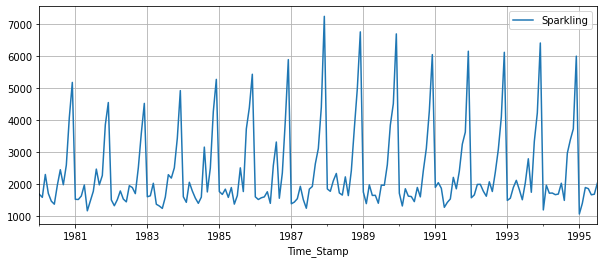

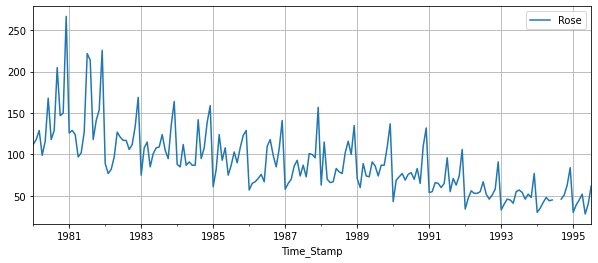

In [8]:
print('Plot for Sparkling Wine Sale')
df_sparkling.plot(grid=True)
print('\n')
print('Plot for Rose Wine Sale')
df_rose.plot(grid=True);

# 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [9]:
# Info of data set
print(df_sparkling.info())
print('\n')
print(df_rose.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB
None


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB
None


In [10]:
# Finding the missing Value
print(df_sparkling.isnull().sum())
print(df_rose.isnull().sum())

Sparkling    0
dtype: int64
Rose    2
dtype: int64


In [11]:
df_rose = df_rose.interpolate()
df_rose

,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0
...,...
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0


In [12]:
#checking for duplicate values
print(df_sparkling.duplicated().sum())
print(df_rose.duplicated().sum())

11
89


#### Check the basic measures of descriptive statistics of the Time Series

In [13]:
print('Descriptive statistics for Sparkling Wine Sale')
print(round(df_sparkling.describe(),3))
print('\n')
print('Descriptive statistics for Rose Wine Sale')
print(round(df_rose.describe(),3))


Descriptive statistics for Sparkling Wine Sale
       Sparkling
count    187.000
mean    2402.417
std     1295.112
min     1070.000
25%     1605.000
50%     1874.000
75%     2549.000
max     7242.000


Descriptive statistics for Rose Wine Sale
          Rose
count  187.000
mean    89.914
std     39.238
min     28.000
25%     62.500
50%     85.000
75%    111.000
max    267.000


Remember, the above measure is independent of the Time Series aspect. As in, it does not take into account the Time Stamped data.

## Decomposition

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

Decompose time series of Sparkling Wine Sale with additive model 


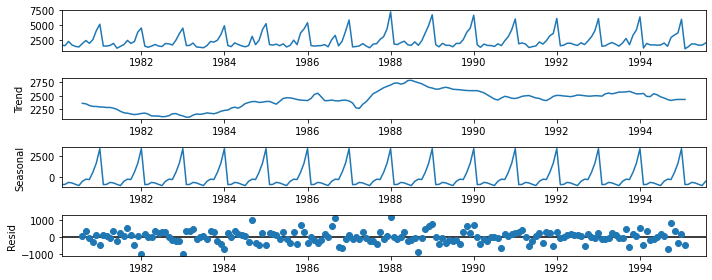

Decompose time series of Rose Wine Sale with additive model 


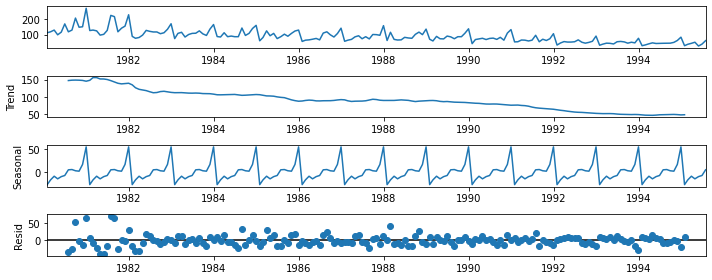

In [15]:
#Decompose the time series additively for Sparkling wine sale data
print('Decompose time series of Sparkling Wine Sale with additive model ')
df_sparkling_add_decompose = seasonal_decompose(df_sparkling, model = 'additive')
df_sparkling_add_decompose.plot()
plt.show()

#Decompose the time series additively for Rose wine Sale data
print('Decompose time series of Rose Wine Sale with additive model ')
df_rose_add_decompose = seasonal_decompose(df_rose, model = 'additive')
df_rose_add_decompose.plot()
plt.show()

Decompose time series of Sparkling Wine Sale with multiplicative model 


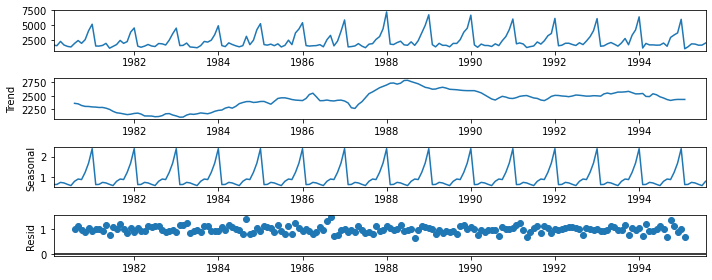

Decompose time series of Rose Wine Sale with multiplicative model 


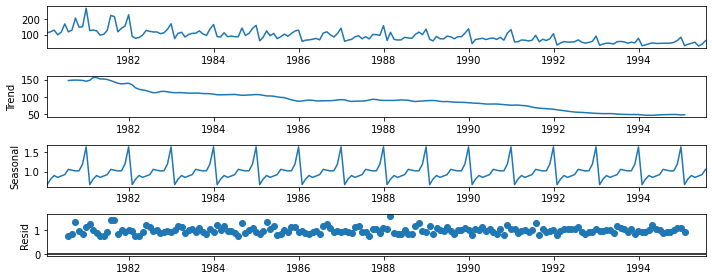

In [16]:
#Decompose the time series multiplicatively for Sparkling wine sale data
print('Decompose time series of Sparkling Wine Sale with multiplicative model ')
df_sparkling_multi_decompose = seasonal_decompose(df_sparkling, model = 'multiplicative')
df_sparkling_multi_decompose.plot()
plt.show()

#Decompose the time series multiplicatively for Rose wine Sale data
print('Decompose time series of Rose Wine Sale with multiplicative model ')
df_rose_multi_decompose = seasonal_decompose(df_rose, model = 'multiplicative')
df_rose_multi_decompose.plot()
plt.show()


# 3. Split the data into training and test. The test data should start in 1991.

#### Split the data into train and test and plot the training and test data. [30% of the most recent data should be in the test set]

In [17]:
# Splitting Sparkling Wine Sale Data 
train_sparkling = df_sparkling[df_sparkling.index<='1991'] 
test_sparkling = df_sparkling[df_sparkling.index>'1991']
# Splitting Rose Wine Sale Data 
train_rose = df_rose[df_rose.index<='1991'] 
test_rose = df_rose[df_rose.index>'1991']

In [18]:
# Printing shape of Sparkling Wine Sale Data
print('Shape of train and test of Sparkling Wine Sale Data') 
print(train_sparkling.shape)
print(test_sparkling.shape)
print('\n')
# Printing shape of Sparkling Wine Sale Data
print('Shape of train and test of Rose Wine Sale Data') 
print(train_rose.shape)
print(test_rose.shape)

Shape of train and test of Sparkling Wine Sale Data
(132, 1)
(55, 1)


Shape of train and test of Rose Wine Sale Data
(132, 1)
(55, 1)


In [19]:
from IPython.display import display

In [20]:
print('First few rows of Training Data(Sparkling)')
display(train_sparkling.head())
print('Last few rows of Training Data(Sparkling)')
display(train_sparkling.tail())
print('First few rows of Test Data(Sparkling)')
display(test_sparkling.head())
print('Last few rows of Test Data(Sparkling)')
display(test_sparkling.tail())
print('\n')
print('First few rows of Training Data(Rose)')
display(train_rose.head())
print('Last few rows of Training Data(Rose)')
display(train_rose.tail())
print('First few rows of Test Data(Rose)')
display(test_rose.head())
print('Last few rows of Test Data(Rose)')
display(test_rose.tail())

First few rows of Training Data(Sparkling)


,Sparkling
Time_Stamp,
1980-01-31,1686
1980-02-29,1591
1980-03-31,2304
1980-04-30,1712
1980-05-31,1471


Last few rows of Training Data(Sparkling)


,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


First few rows of Test Data(Sparkling)


,Sparkling
Time_Stamp,
1991-01-31,1902
1991-02-28,2049
1991-03-31,1874
1991-04-30,1279
1991-05-31,1432


Last few rows of Test Data(Sparkling)


,Sparkling
Time_Stamp,
1995-03-31,1897
1995-04-30,1862
1995-05-31,1670
1995-06-30,1688
1995-07-31,2031




First few rows of Training Data(Rose)


,Rose
Time_Stamp,
1980-01-31,112.0
1980-02-29,118.0
1980-03-31,129.0
1980-04-30,99.0
1980-05-31,116.0


Last few rows of Training Data(Rose)


,Rose
Time_Stamp,
1990-08-31,70.0
1990-09-30,83.0
1990-10-31,65.0
1990-11-30,110.0
1990-12-31,132.0


First few rows of Test Data(Rose)


,Rose
Time_Stamp,
1991-01-31,54.0
1991-02-28,55.0
1991-03-31,66.0
1991-04-30,65.0
1991-05-31,60.0


Last few rows of Test Data(Rose)


,Rose
Time_Stamp,
1995-03-31,45.0
1995-04-30,52.0
1995-05-31,28.0
1995-06-30,40.0
1995-07-31,62.0


Plot for train and test of Sparkling wine sale data


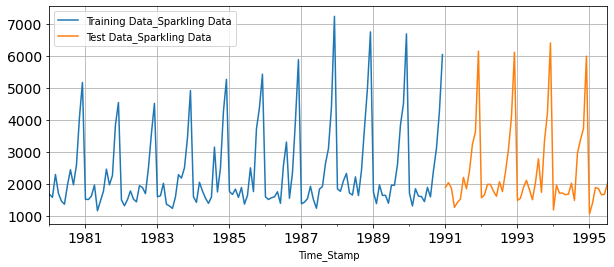

Plot for train and test Rose wine sale data


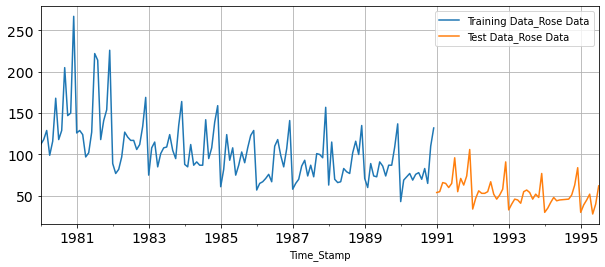

In [21]:
#print('Plot for train and test Sparkling wine sale data')
print('Plot for train and test of Sparkling wine sale data')
train_sparkling['Sparkling'].plot(fontsize=14)
test_sparkling['Sparkling'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data_Sparkling Data','Test Data_Sparkling Data'])
plt.show()
#print('Plot for train and test Rose wine sale data')
print('Plot for train and test Rose wine sale data')
train_rose['Rose'].plot(fontsize=14)
test_rose['Rose'].plot(fontsize=14)
plt.grid()
plt.legend(['Training Data_Rose Data','Test Data_Rose Data'])
plt.show()

##### Note: It is difficult to predict the future observations if such an instance has not happened in the past. From our train-test split we are predicting likewise behaviour as compared to the past years.

# 4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models and simple average models. should also be built on the training data and check the performance on the test data using RMSE.

# Exponential smoothing

In [22]:
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt

### SES -  ETS(A, N, N) - Simple Exponential Smoothing with additive errors
###### The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES). 
###### This method is suitable for forecasting data with no clear trend or seasonal pattern.
In Single ES, the forecast at time (t + 1) is given by Winters,1960

* $F_{t+1} = \alpha Y_t + (1-\alpha) F_t$

Parameter $\alpha$ is called the smoothing constant and its value lies between 0 and 1.
Since the model uses only one smoothing constant, it is called Single Exponential Smoothing.

###### Note: Here, there is both trend and seasonality in the data. So, we should have directly gone for the Triple Exponential Smoothing but Simple Exponential Smoothing and the Double Exponential Smoothing models are built over here to get an idea of how the three types of models compare in this case.

*SimpleExpSmoothing* class must be instantiated and passed the training data. 

The fit() function is then called providing the fit configuration, the alpha value, smoothing_level. 
If this is omitted or set to None, the model will automatically optimize the value.

In [23]:
# creating  class for Sparkling wine sale dataset
model_SES_sparkling = SimpleExpSmoothing(train_sparkling)
# creating  class for Rose wine sale dataset
model_SES_rose = SimpleExpSmoothing(train_rose)

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [24]:
# Fitting the Simple Exponential Smoothing model for Sparkling wine data and asking python to choose the optimal parameters
model_SES_sparkling_autofit = model_SES_sparkling.fit(optimized=True)
# Fitting the Simple Exponential Smoothing model for Rose wine data and asking python to choose the optimal parameters
model_SES_rose_autofit = model_SES_rose.fit(optimized=True)

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [25]:
## Let us check the parameters for Sparkling wine data
print('Parameters for Sparkling wine sales data')
print(model_SES_sparkling_autofit.params)
## Let us check the parameters for Red wine data
print('Parameters for Rose wine sales data')
print(model_SES_rose_autofit.params)

Parameters for Sparkling wine sales data
{'smoothing_level': 0.0, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 2403.762550263244, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
Parameters for Rose wine sales data
{'smoothing_level': 0.09874995867958046, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 134.38699135899094, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [26]:
# Using the fitted model on the training set to forecast on the test set(Sparkling Wine sales data)
SES_predict_sparkling = model_SES_sparkling_autofit.forecast(steps=len(test_sparkling))
print(SES_predict_sparkling)
print('\n')
# Using the fitted model on the training set to forecast on the test set(Rose Wine sales data)
SES_predict_rose = model_SES_rose_autofit.forecast(steps=len(test_rose))
print(SES_predict_rose)

1991-01-31    2403.76255
1991-02-28    2403.76255
1991-03-31    2403.76255
1991-04-30    2403.76255
1991-05-31    2403.76255
1991-06-30    2403.76255
1991-07-31    2403.76255
1991-08-31    2403.76255
1991-09-30    2403.76255
1991-10-31    2403.76255
1991-11-30    2403.76255
1991-12-31    2403.76255
1992-01-31    2403.76255
1992-02-29    2403.76255
1992-03-31    2403.76255
1992-04-30    2403.76255
1992-05-31    2403.76255
1992-06-30    2403.76255
1992-07-31    2403.76255
1992-08-31    2403.76255
1992-09-30    2403.76255
1992-10-31    2403.76255
1992-11-30    2403.76255
1992-12-31    2403.76255
1993-01-31    2403.76255
1993-02-28    2403.76255
1993-03-31    2403.76255
1993-04-30    2403.76255
1993-05-31    2403.76255
1993-06-30    2403.76255
1993-07-31    2403.76255
1993-08-31    2403.76255
1993-09-30    2403.76255
1993-10-31    2403.76255
1993-11-30    2403.76255
1993-12-31    2403.76255
1994-01-31    2403.76255
1994-02-28    2403.76255
1994-03-31    2403.76255
1994-04-30    2403.76255


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


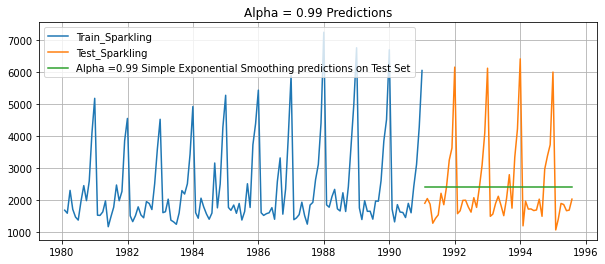

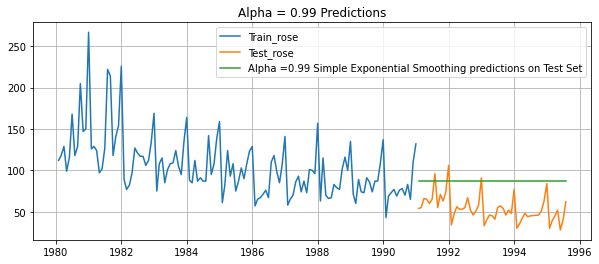

In [27]:
## Plotting the Training data, Test data and the forecasted values for sparkling wine sale data

plt.plot(train_sparkling, label='Train_Sparkling')
plt.plot(test_sparkling, label='Test_Sparkling')
plt.plot(SES_predict_sparkling, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions')
plt.show()

## Plotting the Training data, Test data and the forecasted values for Rose wine sale data

plt.plot(train_rose, label='Train_rose')
plt.plot(test_rose, label='Test_rose')
plt.plot(SES_predict_rose, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions')
plt.show()

In [28]:
## Mean Absolute Percentage Error (MAPE) - Function Definition
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100


In [29]:
#Calculating RMSE value for sparkling wine sale data
print('SES RMSE:',mean_squared_error(test_sparkling.values,SES_predict_sparkling.values,squared=False))
#Calculating RMSE value for Rose wine sale data
print('SES RMSE:',mean_squared_error(test_rose.values,SES_predict_rose.values,squared=False))

SES RMSE: 1275.0817392898339
SES RMSE: 36.79624359473444


In [30]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_sparkling = pd.DataFrame({'Test RMSE Sparkling': [em.rmse(test_sparkling.values,SES_predict_sparkling.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739


In [31]:
# Calculate Test RMSE rose wine sale data
resultsDf_rose = pd.DataFrame({'Test RMSE Rose': [em.rmse(test_rose.values,SES_predict_rose.values)[0]]},index=['Alpha=0.99,SES'])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244


## Holt - ETS(A, A, N) - Holt's linear method with additive errors

## Double Exponential Smoothing

* One of the drawbacks of the simple exponential smoothing is that the model does not do well in the presence of the trend.
* This model is an extension of SES known as Double Exponential model which estimates two smoothing parameters.
* Applicable when data has Trend but no seasonality.
* Two separate components are considered: Level and Trend.
* Level is the local mean.
* One smoothing parameter α corresponds to the level series
* A second smoothing parameter β corresponds to the trend series.

**Double Exponential Smoothing uses two equations to forecast future values of the time series, one for forecating the short term avarage value or level and the other for capturing the trend.**

* Intercept or Level equation, $L_t$ is given by:
$L_t = {\alpha}{Y_t}  + (1 - \alpha)F_t$ 

* Trend equation is given by 
$T_t = {\beta}{(L_t - L_{t-1})}  + (1 - \beta)T_{t-1}$ 

Here, $\alpha$ and $\beta$ are the smoothing constants for level and trend, respectively, 
* 0 <$\alpha$ < 1 and 0 < $\beta$ < 1.

The forecast at time t + 1 is given by
* $F_{t+1} = L_t + T_t$
* $F_{t+n} = L_t + nT_t$

In [32]:
# Initializing the Double Exponential Smoothing Model for sparkling wine sale data 
model_DES_sparkling = Holt(train_sparkling)
# Fitting the model
model_DES_sparkling = model_DES_sparkling.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==')
print('')
print(model_DES_sparkling.params)

# Initializing the Double Exponential Smoothing Model for Rose wine sale data 
model_DES_rose = Holt(train_rose)
# Fitting the model
model_DES_rose = model_DES_rose.fit()
print('')
print('==Holt model Exponential Smoothing Estimated Parameters for rose wine sale data ==')
print('')
print(model_DES_rose.params)


==Holt model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==

{'smoothing_level': 0.6477838823329748, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 1686.0837646037185, 'initial_slope': 27.05547124370359, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}

==Holt model Exponential Smoothing Estimated Parameters for rose wine sale data ==

{'smoothing_level': 0.15789473684210525, 'smoothing_slope': 0.15789473684210525, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [33]:
# Forecasting using this model for the duration of the test set or sparkling wine sale data
DES_predict_sparkling =  model_DES_sparkling.forecast(len(test_sparkling))
print(DES_predict_sparkling)
print('\n')
# Forecasting using this model for the duration of the test set or sparkling wine sale data
DES_predict_rose =  model_DES_rose.forecast(len(test_rose))
print(DES_predict_rose)

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31    5281.408344
1991-02-28    5308.463815
1991-03-31    5335.519286
1991-04-30    5362.574758
1991-05-31    5389.630229
1991-06-30    5416.685700
1991-07-31    5443.741171
1991-08-31    5470.796643
1991-09-30    5497.852114
1991-10-31    5524.907585
1991-11-30    5551.963056
1991-12-31    5579.018527
1992-01-31    5606.073999
1992-02-29    5633.129470
1992-03-31    5660.184941
1992-04-30    5687.240412
1992-05-31    5714.295884
1992-06-30    5741.351355
1992-07-31    5768.406826
1992-08-31    5795.462297
1992-09-30    5822.517769
1992-10-31    5849.573240
1992-11-30    5876.628711
1992-12-31    5903.684182
1993-01-31    5930.739654
1993-02-28    5957.795125
1993-03-31    5984.850596
1993-04-30    6011.906067
1993-05-31    6038.961539
1993-06-30    6066.017010
1993-07-31    6093.072481
1993-08-31    6120.127952
1993-09-30    6147.183424
1993-10-31    6174.238895
1993-11-30    6201.294366
1993-12-31    6228.349837
1994-01-31    6255.405309
1994-02-28    6282.460780
1994-03-31  

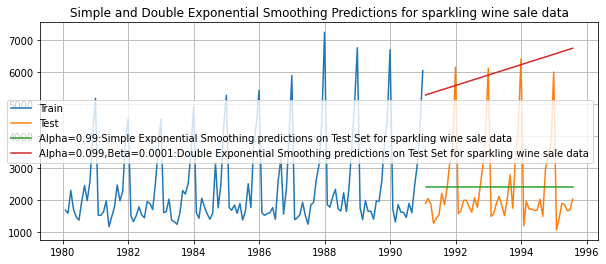

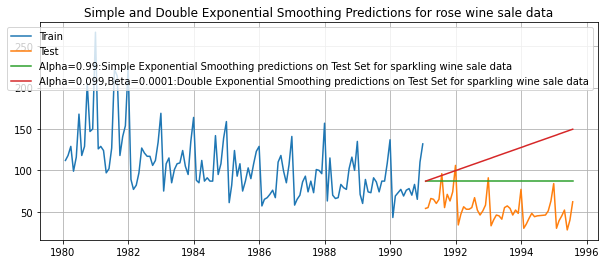

In [34]:
## Plotting the Training data, Test data and the forecasted values for sparkling wine sale data

plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')

plt.plot(SES_predict_sparkling, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set for sparkling wine sale data')
plt.plot(DES_predict_sparkling, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set for sparkling wine sale data')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions for sparkling wine sale data')
plt.show();

## Plotting the Training data, Test data and the forecasted values for rose wine sale data

plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')

plt.plot(SES_predict_rose, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set for sparkling wine sale data')
plt.plot(DES_predict_rose, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set for sparkling wine sale data')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions for rose wine sale data')
plt.show();

We see that the double exponential smoothing is picking up the trend component along with the level component as well.

In [35]:
#Calculating RMSE value for sparkling wine sale data
print('DES RMSE Sparkling:',mean_squared_error(test_sparkling.values,DES_predict_sparkling.values,squared=False))
#Calculating RMSE value for rose wine sale data
print('DES RMSE Rose:',mean_squared_error(test_rose.values,DES_predict_rose.values,squared=False))

DES RMSE Sparkling: 3850.8478154538407
DES RMSE Rose: 70.57245196981661


In [36]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_temp_sparkling = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test_sparkling.values,DES_predict_sparkling.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_temp_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815


In [37]:
# Calculate Test RMSE Rose wine sale data
resultsDf_temp_rose = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test_rose.values,DES_predict_rose.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_temp_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452


### Inference

Here, we see that the Double Exponential Smoothing has actually done well when compared to the Simple Exponential Smoothing. This is because of the fact that the Double Exponential Smoothing model has picked up the trend component as well.

The Holt's model in Python has certain other options of exponential trends or whether the smoothing parameters should be damped. You can try these out later to check whether you get a better forecast.

### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors

In [38]:
# Initializing the Double Exponential Smoothing Model for sparkling wine sale data
model_TES_sparkling = ExponentialSmoothing(train_sparkling,trend='additive',seasonal='additive')
# Fitting the model
model_TES_sparkling = model_TES_sparkling.fit()
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==')
print('')
print(model_TES_sparkling.params)
print('\n')
# Initializing the Double Exponential Smoothing Model for rose wine sale data
model_TES_rose = ExponentialSmoothing(train_rose,trend='additive',seasonal='additive')
# Fitting the model
model_TES_rose = model_TES_rose.fit()
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters for rose wine sale data ==')
print('')
print(model_TES_rose.params)

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub



==Holt Winters model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==

{'smoothing_level': 0.08621043130197674, 'smoothing_slope': 4.534154798535049e-09, 'smoothing_seasonal': 0.47637161151204716, 'damping_slope': nan, 'initial_level': 1684.9037953795528, 'initial_slope': 0.003939090229177399, 'initial_seasons': array([  39.17594081,  -37.22346237,  464.45609233,  206.27645763,
       -140.60405271, -156.56958591,  338.10668461,  856.91481885,
        403.65380447,  971.29856276, 2401.54344377, 3426.51448586]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}




C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters for rose wine sale data ==

{'smoothing_level': 0.13346905584155852, 'smoothing_slope': 0.013798044930131528, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 77.90998273991845, 'initial_slope': 0.0, 'initial_seasons': array([ 37.19347871,  49.53447903,  57.45342246,  46.82461047,
        55.5675085 ,  60.9978818 ,  70.94829431,  76.95581437,
        72.98548228,  71.11492918,  89.18261025, 131.38117683]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [39]:
# Forecasting using this model for the duration of the test set(Sparkling Wine sale data)
TES_predict_sparkling =  model_TES_sparkling.forecast(len(test_sparkling))
TES_predict_sparkling
print('\n')
# Forecasting using this model for the duration of the test set(Rose Wine sale data)
TES_predict_rose =  model_TES_rose.forecast(len(test_rose))
TES_predict_rose

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1991-01-31     44.127161
1991-02-28     56.072510
1991-03-31     63.595803
1991-04-30     52.571339
1991-05-31     60.918586
1991-06-30     65.953308
1991-07-31     75.508069
1991-08-31     81.119938
1991-09-30     76.753955
1991-10-31     74.487750
1991-11-30     92.159780
1991-12-31    133.962695
1992-01-31     39.379346
1992-02-29     51.324695
1992-03-31     58.847987
1992-04-30     47.823524
1992-05-31     56.170770
1992-06-30     61.205492
1992-07-31     70.760253
1992-08-31     76.372122
1992-09-30     72.006139
1992-10-31     69.739934
1992-11-30     87.411964
1992-12-31    129.214879
1993-01-31     34.631530
1993-02-28     46.576879
1993-03-31     54.100171
1993-04-30     43.075708
1993-05-31     51.422955
1993-06-30     56.457677
1993-07-31     66.012438
1993-08-31     71.624307
1993-09-30     67.258323
1993-10-31     64.992119
1993-11-30     82.664149
1993-12-31    124.467064
1994-01-31     29.883714
1994-02-28     41.829063
1994-03-31     49.352355
1994-04-30     38.327892


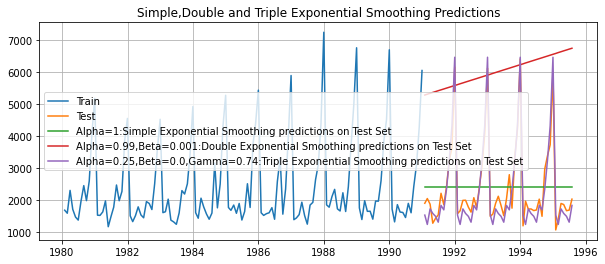

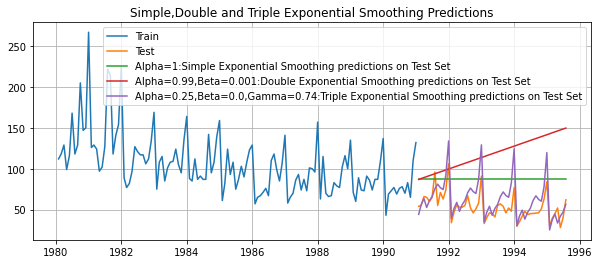

In [40]:
## Plotting the Training data, Test data and the forecasted values for sparkling wine data set
plt.plot(train_sparkling, label='Train')
plt.plot(test_sparkling, label='Test')
plt.plot(SES_predict_sparkling, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_sparkling, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_sparkling, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
plt.show();
print('\n')
## Plotting the Training data, Test data and the forecasted values for Rose wine data set
plt.plot(train_rose, label='Train')
plt.plot(test_rose, label='Test')
plt.plot(SES_predict_rose, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict_rose, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict_rose, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
plt.show();

We see that the Triple Exponential Smoothing is picking up the seasonal component as well.

In [41]:
#Calculating RMSE value for sparkling wine sale data
print('TES RMSE Sparkling:',mean_squared_error(test_sparkling.values,TES_predict_sparkling.values,squared=False))
print('TES RMSE Rose:',mean_squared_error(test_rose.values,TES_predict_rose.values,squared=False))

TES RMSE Sparkling: 362.7541597031013
TES RMSE Rose: 16.443203233657176


In [42]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_temp3_sparkling = pd.DataFrame({'Test RMSE Sparkling': [mean_squared_error(test_sparkling.values,TES_predict_sparkling.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_temp3_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160


In [43]:
# Calculate Test RMSE Rose wine sale data
resultsDf_temp3_rose = pd.DataFrame({'Test RMSE Rose': [mean_squared_error(test_rose.values,TES_predict_rose.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_temp3_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203


## Model 1: Linear Regression

#### For this particular linear regression, we are going to regress the 'Births' variable against the order of the occurrence. For this we need to modify our training data before fitting it into a linear regression.

In [44]:
# For Sparkling Wine sales data
train_time_sparkling = [i+1 for i in range(len(train_sparkling))]
test_time_sparkling = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance for sparkling data','\n',train_time_sparkling)
print('Test Time instance for sparkling data','\n',test_time_sparkling)
print('\n')
# For Rose Wine sales data
train_time_rose = [i+1 for i in range(len(train_rose))]
test_time_rose = [i+133 for i in range(len(test_rose))]
print('Training Time instance for rose data','\n',train_time_rose)
print('Test Time instance for rose data','\n',test_time_rose)

Training Time instance for sparkling data 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance for sparkling data 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


Training Time instance for rose data 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14

We see that we have successfully the generated the numerical time instance order for both the training and test set. Now we will add these values in the training and test set.

In [45]:
# For Sparkling Wine Data Sale
LinearRegression_train_sparkling = train_sparkling.copy()
LinearRegression_test_sparkling = test_sparkling.copy()
print('\n')
# For Sparkling Wine Data Sale
LinearRegression_train_rose = train_rose.copy()
LinearRegression_test_rose = test_rose.copy()

In [46]:
#For Sparkling wine sale data
LinearRegression_train_sparkling['time'] = train_time_sparkling
LinearRegression_test_sparkling['time'] = test_time_sparkling

print('First few rows of Training Data for Sparkling wine sale data')
display(LinearRegression_train_sparkling.head())
print('Last few rows of Training Data for Sparkling wine sale data')
display(LinearRegression_train_sparkling.tail())
print('First few rows of Test Data for Sparkling wine sale data')
display(LinearRegression_test_sparkling.head())
print('Last few rows of Test Data for Sparkling wine sale data')
display(LinearRegression_test_sparkling.tail())
print('\n')
#For Sparkling wine sale data
LinearRegression_train_rose['time'] = train_time_rose
LinearRegression_test_rose['time'] = test_time_rose

print('First few rows of Training Data for rose wine sale data')
display(LinearRegression_train_rose.head())
print('Last few rows of Training Data for rose wine sale data')
display(LinearRegression_train_rose.tail())
print('First few rows of Test Data for rose wine sale data')
display(LinearRegression_test_rose.head())
print('Last few rows of Test Data for rose wine sale data')
display(LinearRegression_test_rose.tail())

First few rows of Training Data for Sparkling wine sale data


,Sparkling,time
Time_Stamp,,
1980-01-31,1686,1
1980-02-29,1591,2
1980-03-31,2304,3
1980-04-30,1712,4
1980-05-31,1471,5


Last few rows of Training Data for Sparkling wine sale data


,Sparkling,time
Time_Stamp,,
1990-08-31,1605,128
1990-09-30,2424,129
1990-10-31,3116,130
1990-11-30,4286,131
1990-12-31,6047,132


First few rows of Test Data for Sparkling wine sale data


,Sparkling,time
Time_Stamp,,
1991-01-31,1902,133
1991-02-28,2049,134
1991-03-31,1874,135
1991-04-30,1279,136
1991-05-31,1432,137


Last few rows of Test Data for Sparkling wine sale data


,Sparkling,time
Time_Stamp,,
1995-03-31,1897,183
1995-04-30,1862,184
1995-05-31,1670,185
1995-06-30,1688,186
1995-07-31,2031,187




First few rows of Training Data for rose wine sale data


,Rose,time
Time_Stamp,,
1980-01-31,112.0,1
1980-02-29,118.0,2
1980-03-31,129.0,3
1980-04-30,99.0,4
1980-05-31,116.0,5


Last few rows of Training Data for rose wine sale data


,Rose,time
Time_Stamp,,
1990-08-31,70.0,128
1990-09-30,83.0,129
1990-10-31,65.0,130
1990-11-30,110.0,131
1990-12-31,132.0,132


First few rows of Test Data for rose wine sale data


,Rose,time
Time_Stamp,,
1991-01-31,54.0,133
1991-02-28,55.0,134
1991-03-31,66.0,135
1991-04-30,65.0,136
1991-05-31,60.0,137


Last few rows of Test Data for rose wine sale data


,Rose,time
Time_Stamp,,
1995-03-31,45.0,183
1995-04-30,52.0,184
1995-05-31,28.0,185
1995-06-30,40.0,186
1995-07-31,62.0,187


Now that our training and test data has been modified, let us go ahead use $\underline{Linear Regression}$ to build the model on the training data and test the model on the test data.

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
lr_sparkling = LinearRegression()
lr_rose = LinearRegression()

In [49]:
lr_sparkling.fit(LinearRegression_train_sparkling[['time']],LinearRegression_train_sparkling['Sparkling'])
lr_rose.fit(LinearRegression_train_rose[['time']],LinearRegression_train_rose['Rose'])

LinearRegression()

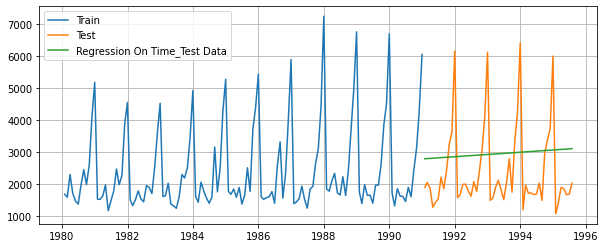

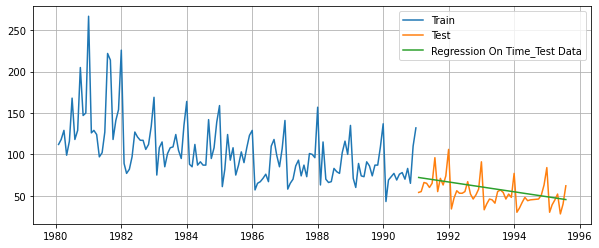

In [50]:
# ploting Regression on time test data for Sparkling wine sale data
train_predictions_model_sparkling            = lr_sparkling.predict(LinearRegression_train_sparkling[['time']])
LinearRegression_train_sparkling['RegOnTime'] = train_predictions_model_sparkling

test_predictions_model_sparkling             = lr_sparkling.predict(LinearRegression_test_sparkling[['time']])
LinearRegression_test_sparkling['RegOnTime']  = test_predictions_model_sparkling

plt.plot( train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LinearRegression_test_sparkling['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid()
plt.show();
print('\n')
# ploting Regression on time test data for Rose wine sale data
train_predictions_model_rose            = lr_rose.predict(LinearRegression_train_rose[['time']])
LinearRegression_train_rose['RegOnTime'] = train_predictions_model_rose

test_predictions_model_rose             = lr_rose.predict(LinearRegression_test_rose[['time']])
LinearRegression_test_rose['RegOnTime']  = test_predictions_model_rose

plt.plot( train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LinearRegression_test_rose['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid()
plt.show();

#### Defining the functions for calculating the accuracy metrics.

In [51]:
from sklearn import metrics

### Model Evaluation

In [52]:
#RMSE for Sparkling Wine Sale Data
rmse_lr_model_test_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],test_predictions_model_sparkling,squared=False)
print("For RegressionOnTime forecast on the Test Data of Sparkling Wine Sale Data ,  RMSE is %3.3f " %(rmse_lr_model_test_sparkling))
#RMSE for Rose Wine Sale Data
rmse_lr_model_test_rose = metrics.mean_squared_error(test_rose['Rose'],test_predictions_model_rose,squared=False)
print("For RegressionOnTime forecast on the Test Data of Rose Wine Sale Data ,  RMSE is %3.3f " %(rmse_lr_model_test_rose))

For RegressionOnTime forecast on the Test Data of Sparkling Wine Sale Data ,  RMSE is 1389.135 
For RegressionOnTime forecast on the Test Data of Rose Wine Sale Data ,  RMSE is 15.269 


In [53]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_lr_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_lr_model_test_sparkling]},index=['RegressionOnTime'])
resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_lr_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160
RegressionOnTime,1389.135175


In [54]:
# Calculate Test RMSE Rose wine sale data
resultsDf_lr_rose = pd.DataFrame({'Test RMSE Rose': [rmse_lr_model_test_rose]},index=['RegressionOnTime'])
resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_lr_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955


## Model 2: Naive Approach: $\hat{y}_{t+1} = y_t$

#### For this particular naive model, we say that the prediction for tomorrow is the same as today and the prediction for day after tomorrow is tomorrow and since the prediction of tomorrow is same as today,therefore the prediction for day after tomorrow is also today.

In [55]:
#Sparkling wine sale data
NaiveModel_train_sparkling = train_sparkling.copy()
NaiveModel_test_sparkling = test_sparkling.copy()
#Rose wine sale data
NaiveModel_train_rose = train_rose.copy()
NaiveModel_test_rose = test_rose.copy()

In [56]:
train_sparkling.tail()

,Sparkling
Time_Stamp,
1990-08-31,1605
1990-09-30,2424
1990-10-31,3116
1990-11-30,4286
1990-12-31,6047


In [57]:
#Sparkling wine sale data
NaiveModel_test_sparkling['naive'] = np.asarray(train_sparkling['Sparkling'])[len(np.asarray(train_sparkling['Sparkling']))-1]
print(NaiveModel_test_sparkling['naive'].head())
print('\n')
#Rose wine sale data
NaiveModel_test_rose['naive'] = np.asarray(train_rose['Rose'])[len(np.asarray(train_rose['Rose']))-1]
print(NaiveModel_test_rose['naive'].head())

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64


Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: naive, dtype: float64


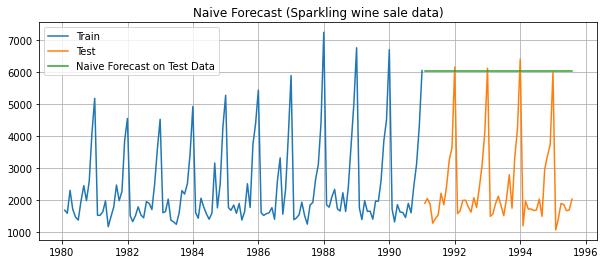

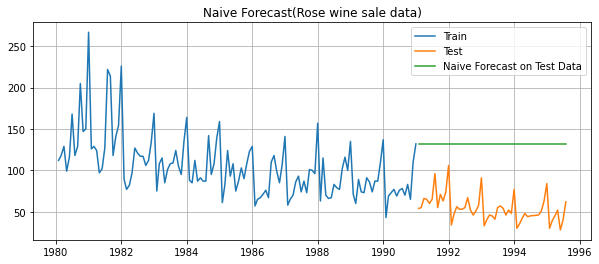

In [58]:
# ploting Naives on data for Sparkling wine sale data
plt.plot(NaiveModel_train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(NaiveModel_test_sparkling['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast (Sparkling wine sale data)")
plt.grid()
plt.show();
print('\n')
# ploting Naives on data for Rose wine sale data
plt.plot(NaiveModel_train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(NaiveModel_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast(Rose wine sale data)")
plt.grid()
plt.show();

### Model Evaluation

In [59]:
#RMSE for Sparkling  and Rose Wine Sale Data
rmse_naive_model_test_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],NaiveModel_test_sparkling['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Sparkling wine sale data,  RMSE is %3.3f" %(rmse_naive_model_test_sparkling))
rmse_naive_model_test_rose = metrics.mean_squared_error(test_rose['Rose'],NaiveModel_test_rose['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data for Rose wine sale data,  RMSE is %3.3f" %(rmse_naive_model_test_sparkling))

For RegressionOnTime forecast on the Test Data for Sparkling wine sale data,  RMSE is 3864.279
For RegressionOnTime forecast on the Test Data for Rose wine sale data,  RMSE is 3864.279


In [60]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_naive_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_naive_model_test_sparkling]},index=['NaiveModel'])
resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_naive_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160
RegressionOnTime,1389.135175
NaiveModel,3864.279352


In [61]:
# Calculate Test RMSE Rose wine sale data
resultsDf_naive_rose = pd.DataFrame({'Test RMSE Rose': [rmse_naive_model_test_rose]},index=['NaiveModel'])
resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_naive_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773


## Method 3: Simple Average

#### For this particular simple average method, we will forecast by using the average of the training values.

In [62]:
# For Sparkling wine sale data
SimpleAverage_train_sparkling = train_sparkling.copy()
SimpleAverage_test_sparkling = test_sparkling.copy()
# For Rose wine sale data
SimpleAverage_train_rose = train_rose.copy()
SimpleAverage_test_rose = test_rose.copy()

In [63]:
# Applying Mean value for Sparkling wine sale data
SimpleAverage_test_sparkling['mean_forecast'] = train_sparkling['Sparkling'].mean()
print(SimpleAverage_test_sparkling.head())
print('\n')
# Applying Mean value for Sparkling wine sale data
SimpleAverage_test_rose['mean_forecast'] = train_rose['Rose'].mean()
print(SimpleAverage_test_rose.head())

            Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303


            Rose  mean_forecast
Time_Stamp                     
1991-01-31  54.0     104.939394
1991-02-28  55.0     104.939394
1991-03-31  66.0     104.939394
1991-04-30  65.0     104.939394
1991-05-31  60.0     104.939394


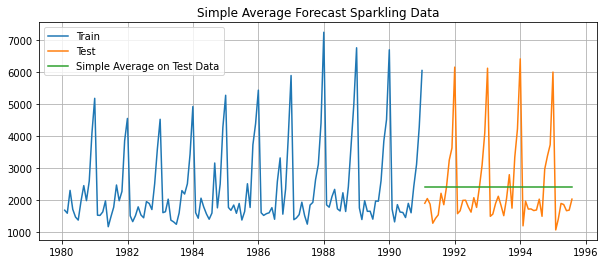

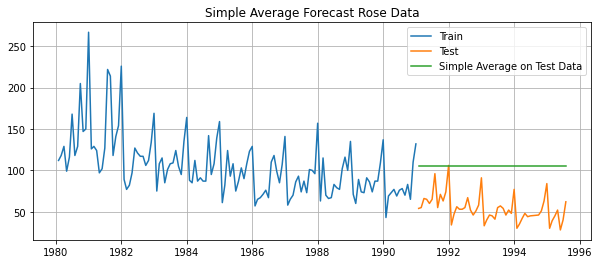

In [64]:
# ploting Average on time test data for Sparkling wine sale data
plt.plot(SimpleAverage_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAverage_test_sparkling['Sparkling'], label='Test')

plt.plot(SimpleAverage_test_sparkling['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast Sparkling Data")
plt.grid()
plt.show();
print('\n')
# ploting Average on time test data for Sparkling wine sale data
plt.plot(SimpleAverage_train_rose['Rose'], label='Train')
plt.plot(SimpleAverage_test_rose['Rose'], label='Test')

plt.plot(SimpleAverage_test_rose['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast Rose Data")
plt.grid()
plt.show();

### Model Evaluation

In [65]:
#RMSE for Sparkling  and Rose Wine Sale Data
rmse_simpleaverage_model_test_sparkling = metrics.mean_squared_error(test_sparkling['Sparkling'],SimpleAverage_test_sparkling['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data of Sparkling Wine Sale Data,  RMSE is %3.3f" %(rmse_simpleaverage_model_test_sparkling))
rmse_simpleaverage_model_test_rose = metrics.mean_squared_error(test_rose['Rose'],SimpleAverage_test_rose['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data of rose Wine Sale Data,  RMSE is %3.3f" %(rmse_simpleaverage_model_test_rose))



For Simple Average forecast on the Test Data of Sparkling Wine Sale Data,  RMSE is 1275.082
For Simple Average forecast on the Test Data of rose Wine Sale Data,  RMSE is 53.461


In [66]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_simpleaverage_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_simpleaverage_model_test_sparkling]}
                           ,index=['SimpleAverageModel'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_simpleaverage_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804


In [67]:
# Calculate Test RMSE Rose wine sale data
resultsDf_simpleaverage_rose = pd.DataFrame({'Test RMSE Rose': [rmse_simpleaverage_model_test_rose]}
                           ,index=['SimpleAverageModel'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_simpleaverage_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570


# 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

### alpha = 0.05

In [68]:
from statsmodels.tsa.stattools import adfuller

In [69]:
# Augmented Dickey Fuller Test (ADF Test) for Sparkling Wine sale data
print('Augmented Dickey Fuller Test (ADF Test) for Sparkling Wine sale data')
dftest_sparkling = adfuller(df_sparkling,regression='ct')
print('DF test statistic is %3.3f' %dftest_sparkling[0])
print('DF test p-value is' ,dftest_sparkling[1])
print('Number of lags used' ,dftest_sparkling[2])
print('\n')
print('Augmented Dickey Fuller Test (ADF Test) for Rose Wine sale data')
dftest_rose = adfuller(df_rose,regression='ct')
print('DF test statistic is %3.3f' %dftest_rose[0])
print('DF test p-value is' ,dftest_rose[1])
print('Number of lags used' ,dftest_rose[2])

Augmented Dickey Fuller Test (ADF Test) for Sparkling Wine sale data
DF test statistic is -1.798
DF test p-value is 0.7055958459932714
Number of lags used 12


Augmented Dickey Fuller Test (ADF Test) for Rose Wine sale data
DF test statistic is -2.240
DF test p-value is 0.46713716277930917
Number of lags used 13


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [70]:
# one level of differencing for for Sparkling Wine sale data
print('One level of differencingfor Sparkling Wine sale data')
dftest_sparkling = adfuller(df_sparkling.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_sparkling[0])
print('DF test p-value is %3.3f' %dftest_sparkling[1])
print('Number of lags used' ,dftest_sparkling[2])
print('\n')
# one level of differencing for for Rose Wine sale data
print('One level of differencing for Rose Wine sale data')
dftest_rose = adfuller(df_rose.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest_rose[0])
print('DF test p-value is %3.3f' %dftest_rose[1])
print('Number of lags used' ,dftest_rose[2])

One level of differencingfor Sparkling Wine sale data
DF test statistic is -44.912
DF test p-value is 0.000
Number of lags used 10


One level of differencing for Rose Wine sale data
DF test statistic is -8.162
DF test p-value is 0.000
Number of lags used 12


Now, let us go ahead and plot the stationary series.

Plot for one level of differencingfor Sparkling Wine sale data


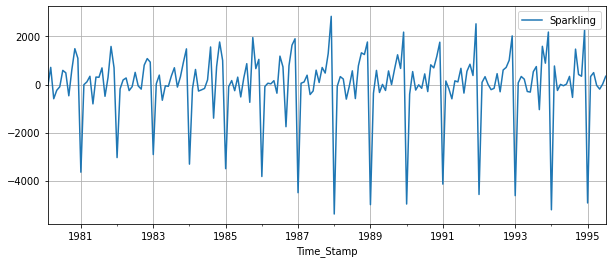



Plot for one level of differencing for Rose Wine sale data


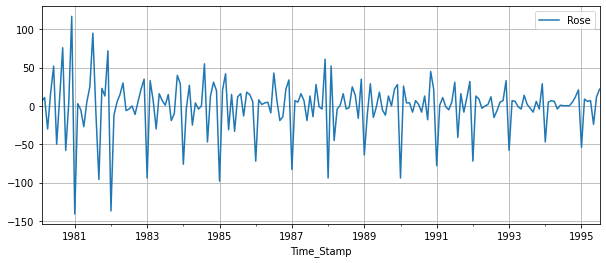

In [71]:
# Plot for One level of differencingfor Sparkling Wine sale data
print('Plot for one level of differencingfor Sparkling Wine sale data')
df_sparkling.diff().dropna().plot(grid=True)
plt.show();
print('\n')
# Plot for One level of differencing for Rose Wine sale data
print('Plot for one level of differencing for Rose Wine sale data')
df_rose.diff().dropna().plot(grid=True)
plt.show();

# 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

### Build an Automated version of a ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [72]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [73]:
# Creating an empty Dataframe with column names only for sparkling data
ARIMA_AIC_sparkling = pd.DataFrame(columns=['param sparkling', 'AIC sparkling'])
print(ARIMA_AIC_sparkling)
print('\n')
# Creating an empty Dataframe with column names only for rose data
ARIMA_AIC_rose = pd.DataFrame(columns=['param rose', 'AIC rose'])
print(ARIMA_AIC_rose)

Empty DataFrame
Columns: [param sparkling, AIC sparkling]
Index: []


Empty DataFrame
Columns: [param rose, AIC rose]
Index: []


In [74]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model_sparkling = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC sparkling:{}'.format(param,ARIMA_model_sparkling.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC_sparkling = ARIMA_AIC_sparkling.append({'param sparkling':param, 'AIC sparkling': ARIMA_model_sparkling.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC sparkling:2267.6630357855465
ARIMA(0, 1, 1) - AIC sparkling:2263.060015591812
ARIMA(0, 1, 2) - AIC sparkling:2234.408323132853
ARIMA(0, 1, 3) - AIC sparkling:2233.9948577616415
ARIMA(1, 1, 0) - AIC sparkling:2266.6085393190097
ARIMA(1, 1, 1) - AIC sparkling:2235.755094660315


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC sparkling:2234.5272004515837
ARIMA(1, 1, 3) - AIC sparkling:2235.607807333272
ARIMA(2, 1, 0) - AIC sparkling:2260.365743968097
ARIMA(2, 1, 1) - AIC sparkling:2233.777626229804
ARIMA(2, 1, 2) - AIC sparkling:2213.509212349606


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC sparkling:2232.9369831015447
ARIMA(3, 1, 0) - AIC sparkling:2257.72337899794
ARIMA(3, 1, 1) - AIC sparkling:2235.4985697021007


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(3, 1, 2) - AIC sparkling:2230.7664562362497
ARIMA(3, 1, 3) - AIC sparkling:2221.459071080334


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [75]:
 for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model_rose = ARIMA(train_rose['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC rose:{}'.format(param,ARIMA_model_rose.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC_rose = ARIMA_AIC_rose.append({'param rose':param, 'AIC rose': ARIMA_model_rose.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC rose:1333.1546729124348
ARIMA(0, 1, 1) - AIC rose:1282.3098319748274
ARIMA(0, 1, 2) - AIC rose:1279.6715288535775
ARIMA(0, 1, 3) - AIC rose:1280.5453761734652
ARIMA(1, 1, 0) - AIC rose:1317.3503105381546
ARIMA(1, 1, 1) - AIC rose:1280.5742295380087
ARIMA(1, 1, 2) - AIC rose:1279.870723423192
ARIMA(1, 1, 3) - AIC rose:1281.8707223309975
ARIMA(2, 1, 0) - AIC rose:1298.6110341604958
ARIMA(2, 1, 1) - AIC rose:1281.507862186847
ARIMA(2, 1, 2) - AIC rose:1281.8707222264254


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(2, 1, 3) - AIC rose:1274.695786427307
ARIMA(3, 1, 0) - AIC rose:1297.4810917271682
ARIMA(3, 1, 1) - AIC rose:1282.419277627197


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(3, 1, 2) - AIC rose:1283.7207405977165
ARIMA(3, 1, 3) - AIC rose:1278.6590325567004


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [76]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value
print('AIC values in the ascending order to get the parameters for the minimum AIC value (Sparkling Data)')
print(ARIMA_AIC_sparkling.sort_values(by='AIC sparkling',ascending=True).head())
print('\n')
print('AIC values in the ascending order to get the parameters for the minimum AIC value (Rose Data)')
print(ARIMA_AIC_rose.sort_values(by='AIC rose',ascending=True).head())

AIC values in the ascending order to get the parameters for the minimum AIC value (Sparkling Data)
   param sparkling  AIC sparkling
10       (2, 1, 2)    2213.509212
15       (3, 1, 3)    2221.459071
14       (3, 1, 2)    2230.766456
11       (2, 1, 3)    2232.936983
9        (2, 1, 1)    2233.777626


AIC values in the ascending order to get the parameters for the minimum AIC value (Rose Data)
   param rose     AIC rose
11  (2, 1, 3)  1274.695786
15  (3, 1, 3)  1278.659033
2   (0, 1, 2)  1279.671529
6   (1, 1, 2)  1279.870723
3   (0, 1, 3)  1280.545376


In [77]:
# Fitting minimum AIC value for Sparkling wine sale data
auto_ARIMA_sparkling = ARIMA(train_sparkling, order=(2,1,2))
results_auto_ARIMA_sparkling = auto_ARIMA_sparkling.fit()
print(results_auto_ARIMA_sparkling.summary());
print('\n')
# Fitting minimum AIC value for Rose wine sale data
auto_ARIMA_rose = ARIMA(train_rose, order=(2,1,3))
results_auto_ARIMA_rose = auto_ARIMA_rose.fit()
print(results_auto_ARIMA_rose.summary());

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 20 Mar 2022   AIC                           2213.509
Time:                        22:52:08   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.217      0.0

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -631.348
Date:                Sun, 20 Mar 2022   AIC                           1274.696
Time:                        22:52:09   BIC                           1291.947
Sample:                    01-31-1980   HQIC                          1281.706
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6779      0.084    -20.019      0.000      -1.842      -1.514
ar.L2         -0.7287      0.084     -8.691      0.000      -0.893      -0.564
ma.L1          1.0445      0.570      1.833      0.0

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


##### Diagnostics plot.

Diagnostics plot for Sparkling Wine sale data
/n
Diagnostics plot for Sparkling Wine sale data


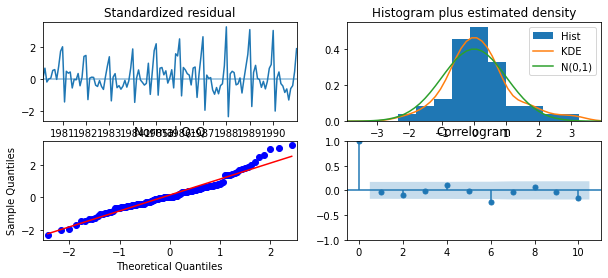

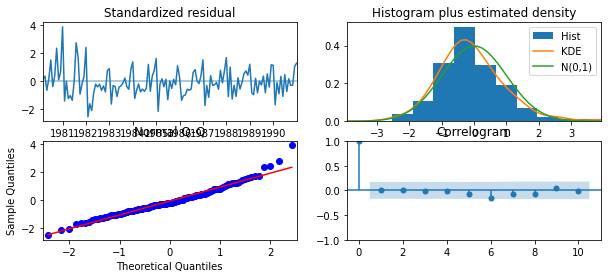

In [78]:
# Diagnostics plot for Sparkling Wine sale data
print('Diagnostics plot for Sparkling Wine sale data')
results_auto_ARIMA_sparkling.plot_diagnostics();
print('/n')
# Diagnostics plot for Sparkling Wine sale data
print('Diagnostics plot for Sparkling Wine sale data')
results_auto_ARIMA_rose.plot_diagnostics();

### Predict on the Test Set using this model and evaluate the model.

In [79]:
predicted_auto_ARIMA_sparkling = results_auto_ARIMA_sparkling.forecast(steps=len(test_sparkling))
predicted_auto_ARIMA_rose = results_auto_ARIMA_rose.forecast(steps=len(test_rose))

In [80]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [81]:
rmse_arima_sparkling = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_ARIMA_sparkling,squared=False)
mape_arima_sparkling = mean_absolute_percentage_error(test_sparkling['Sparkling'],predicted_auto_ARIMA_sparkling)
print('RMSE of Sparkling Wine Sale Data:',rmse_arima_sparkling,'\nMAPE of Sparkling Wine Sale Data:',mape_arima_sparkling)
print('\n')
rmse_arima_rose = mean_squared_error(test_rose['Rose'],predicted_auto_ARIMA_rose,squared=False)
mape_arima_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_auto_ARIMA_rose)
print('RMSE of Rose Wine Sale Data:',rmse_arima_rose,'\nMAPE of Rose Wine Sale Data:',mape_arima_rose)

RMSE of Sparkling Wine Sale Data: 1299.9795334022403 
MAPE of Sparkling Wine Sale Data: 47.099972867001924


RMSE of Rose Wine Sale Data: 36.8159446995155 
MAPE of Rose Wine Sale Data: 75.84498541161119


In [82]:
# Calculate Test RMSE Sparkling wine sale data
resultsDf_arima_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_arima_sparkling]}
                           ,index=['ARIMA(2,1,2)'])

resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_arima_sparkling])
resultsDf_sparkling

,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739
"Alpha=1,Beta=0.0189:DES",3850.847815
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160
RegressionOnTime,1389.135175
NaiveModel,3864.279352
SimpleAverageModel,1275.081804
"ARIMA(2,1,2)",1299.979533


In [83]:
# Calculate Test RMSE Rose wine sale data
resultsDf_arima_rose = pd.DataFrame({'Test RMSE Rose': [rmse_arima_rose]}
                           ,index=['ARIMA(2,1,3)'])

resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_arima_rose])
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"ARIMA(2,1,3)",36.815945


### Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [84]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)


In [85]:
SARIMA_AIC_sparkling = pd.DataFrame(columns=['param sparkling','seasonal sparkling', 'AIC sparkling'])
print(SARIMA_AIC_sparkling)
print('\n')
SARIMA_AIC_rose = pd.DataFrame(columns=['param rose','seasonal rose', 'AIC rose'])
print(SARIMA_AIC_rose)


Empty DataFrame
Columns: [param sparkling, seasonal sparkling, AIC sparkling]
Index: []


Empty DataFrame
Columns: [param rose, seasonal rose, AIC rose]
Index: []


In [86]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_sparkling = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_sparkling = SARIMA_model_sparkling.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC sparkling:{}'.format(param, param_seasonal, results_SARIMA_sparkling.aic))
        SARIMA_AIC_sparkling = SARIMA_AIC_sparkling.append({'param sparkling':param,'seasonal sparkling':param_seasonal ,'AIC sparkling': results_SARIMA_sparkling.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC sparkling:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC sparkling:2152.3780761716307
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC sparkling:1955.6355536892759
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC sparkling:1863.784515497349
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC sparkling:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC sparkling:2079.559984443175
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC sparkling:1926.93601111171
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC sparkling:1803.3929094849914
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC sparkling:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC sparkling:1841.1993617510577
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC sparkling:1810.9177805656884
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC sparkling:1725.537642555017
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC sparkling:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC sparkling:1750.6879953816742
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC sparkling:1739.4489858030063
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC sparkling:

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(1, 0, 1, 6) - AIC sparkling:1890.9466984579578
SARIMA(2, 1, 3)x(1, 0, 2, 6) - AIC sparkling:1773.5976773626735
SARIMA(2, 1, 3)x(1, 0, 3, 6) - AIC sparkling:1710.7615612266322
SARIMA(2, 1, 3)x(2, 0, 0, 6) - AIC sparkling:1759.60187037646
SARIMA(2, 1, 3)x(2, 0, 1, 6) - AIC sparkling:1762.665558537924
SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC sparkling:1711.4481229915202
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC sparkling:1632.6392300573475
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC sparkling:1675.517390587142
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC sparkling:1677.244732646836
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC sparkling:1663.3558301901064
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC sparkling:1630.8639393226097
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC sparkling:2208.40250139061
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC sparkling:2141.8644518455276
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC sparkling:1943.9534295663761
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC sparkling:1850.9494830390079
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC sparkling:21

In [87]:
for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC rose:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param rose':param,'seasonal rose':param_seasonal ,'AIC rose': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC rose:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC rose:1264.4996261113863
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC rose:1144.7077471827183
SARIMA(0, 1, 0)x(0, 0, 3, 6) - AIC rose:1081.271383062523
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC rose:1274.7897737087983
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC rose:1241.787094514905
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC rose:1146.3093266722124
SARIMA(0, 1, 0)x(1, 0, 3, 6) - AIC rose:1058.9861743124393
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC rose:1137.9167236212038
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC rose:1137.4533629515163
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC rose:1117.022442618218
SARIMA(0, 1, 0)x(2, 0, 3, 6) - AIC rose:1058.8048206421715
SARIMA(0, 1, 0)x(3, 0, 0, 6) - AIC rose:1072.546583469527
SARIMA(0, 1, 0)x(3, 0, 1, 6) - AIC rose:1061.3687765139657
SARIMA(0, 1, 0)x(3, 0, 2, 6) - AIC rose:1058.042505188957
SARIMA(0, 1, 0)x(3, 0, 3, 6) - AIC rose:1058.8917100855674
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC rose:1263.5369097383968
SA

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 0, 6) - AIC rose:1081.0116551269775
SARIMA(1, 1, 3)x(2, 0, 1, 6) - AIC rose:1083.9855650529037
SARIMA(1, 1, 3)x(2, 0, 2, 6) - AIC rose:1035.2464709110382
SARIMA(1, 1, 3)x(2, 0, 3, 6) - AIC rose:953.6849506983023
SARIMA(1, 1, 3)x(3, 0, 0, 6) - AIC rose:1028.1858819697336
SARIMA(1, 1, 3)x(3, 0, 1, 6) - AIC rose:1019.7324489889844
SARIMA(1, 1, 3)x(3, 0, 2, 6) - AIC rose:1007.7128236299184
SARIMA(1, 1, 3)x(3, 0, 3, 6) - AIC rose:955.6592575796107
SARIMA(2, 1, 0)x(0, 0, 0, 6) - AIC rose:1280.253756153577
SARIMA(2, 1, 0)x(0, 0, 1, 6) - AIC rose:1231.9630734540415
SARIMA(2, 1, 0)x(0, 0, 2, 6) - AIC rose:1128.9876565220654
SARIMA(2, 1, 0)x(0, 0, 3, 6) - AIC rose:1058.6689517710352
SARIMA(2, 1, 0)x(1, 0, 0, 6) - AIC rose:1219.0664587880879
SARIMA(2, 1, 0)x(1, 0, 1, 6) - AIC rose:1186.6130717490503
SARIMA(2, 1, 0)x(1, 0, 2, 6) - AIC rose:1111.6702480690008
SARIMA(2, 1, 0)x(1, 0, 3, 6) - AIC rose:1044.3478369868571
SARIMA(2, 1, 0)x(2, 0, 0, 6) - AIC rose:1099.0398509026238


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 0, 2, 6) - AIC rose:1026.6825046927765
SARIMA(2, 1, 3)x(2, 0, 3, 6) - AIC rose:951.7442980769265
SARIMA(2, 1, 3)x(3, 0, 0, 6) - AIC rose:976.9942648302707
SARIMA(2, 1, 3)x(3, 0, 1, 6) - AIC rose:978.2974714183146
SARIMA(2, 1, 3)x(3, 0, 2, 6) - AIC rose:961.6341248954265
SARIMA(2, 1, 3)x(3, 0, 3, 6) - AIC rose:953.2056120540866
SARIMA(3, 1, 0)x(0, 0, 0, 6) - AIC rose:1269.8130062641505
SARIMA(3, 1, 0)x(0, 0, 1, 6) - AIC rose:1231.0483564306815
SARIMA(3, 1, 0)x(0, 0, 2, 6) - AIC rose:1118.5942596318896
SARIMA(3, 1, 0)x(0, 0, 3, 6) - AIC rose:1044.5526530822315
SARIMA(3, 1, 0)x(1, 0, 0, 6) - AIC rose:1208.6291501251992
SARIMA(3, 1, 0)x(1, 0, 1, 6) - AIC rose:1176.6540329798565
SARIMA(3, 1, 0)x(1, 0, 2, 6) - AIC rose:1109.7809399884463
SARIMA(3, 1, 0)x(1, 0, 3, 6) - AIC rose:1034.920147508606
SARIMA(3, 1, 0)x(2, 0, 0, 6) - AIC rose:1079.2853822014602
SARIMA(3, 1, 0)x(2, 0, 1, 6) - AIC rose:1072.813874847871
SARIMA(3, 1, 0)x(2, 0, 2, 6) - AIC rose:1066.9903339600583
SARI

In [88]:
# Sorting SARIMA Model AIC value for Sparkling Wine Sale data
print(SARIMA_AIC_sparkling.sort_values(by=['AIC sparkling']).head())


    param sparkling seasonal sparkling  AIC sparkling
191       (2, 1, 3)       (3, 0, 3, 6)    1630.863939
187       (2, 1, 3)       (2, 0, 3, 6)    1632.639230
59        (0, 1, 3)       (2, 0, 3, 6)    1633.327863
123       (1, 1, 3)       (2, 0, 3, 6)    1633.988369
251       (3, 1, 3)       (2, 0, 3, 6)    1634.617345


In [89]:
# Sorting SARIMA Model AIC value for Rose Wine Sale data
print(SARIMA_AIC_rose.sort_values(by=['AIC rose']).head())

    param rose seasonal rose    AIC rose
187  (2, 1, 3)  (2, 0, 3, 6)  951.744298
59   (0, 1, 3)  (2, 0, 3, 6)  952.073632
251  (3, 1, 3)  (2, 0, 3, 6)  952.582102
191  (2, 1, 3)  (3, 0, 3, 6)  953.205612
123  (1, 1, 3)  (2, 0, 3, 6)  953.684951


In [90]:
import statsmodels.api as sm
# Fitting best value for Sparkling value
auto_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_sparkling = auto_SARIMA_sparkling.fit(maxiter=1000)
print(results_auto_SARIMA_sparkling.summary())
# Fitting best value for Rose value
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(1, 1, 3),
                                seasonal_order=(2, 0, 3, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  132
Model:             SARIMAX(3, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -805.309
Date:                           Sun, 20 Mar 2022   AIC                           1634.617
Time:                                   23:06:41   BIC                           1666.914
Sample:                               01-31-1980   HQIC                          1647.715
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1695      0.154     -7.615      0.000      -1.471      -0.869
ar.L2         -0.9186      0.163     -5.631

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                              Rose   No. Observations:                  132
Model:             SARIMAX(1, 1, 3)x(2, 0, 3, 6)   Log Likelihood                -466.842
Date:                           Sun, 20 Mar 2022   AIC                            953.685
Time:                                   23:06:43   BIC                            980.598
Sample:                               01-31-1980   HQIC                           964.599
                                    - 12-31-1990                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2239      0.499     -0.448      0.654      -1.203       0.755
ma.L1         -0.5388    609.478     -0.001

plot diagnostics for SARIMA model for Sparkling Data


plot diagnostics for SARIMA model for Rose Data


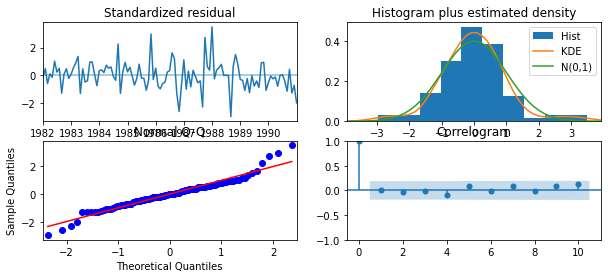

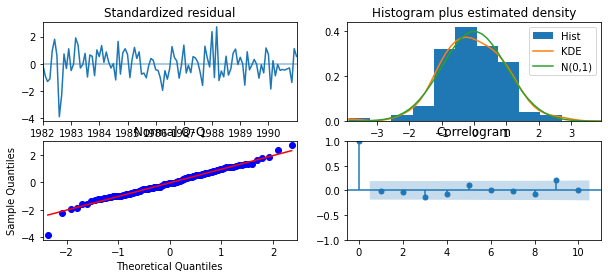

In [91]:
print('plot diagnostics for SARIMA model for Sparkling Data')
results_auto_SARIMA_sparkling.plot_diagnostics();
print('\n')
print('plot diagnostics for SARIMA model for Rose Data')
results_auto_SARIMA_rose.plot_diagnostics();

## Predict on the Test Set using this model and evaluate the model.

In [92]:
predicted_auto_SARIMA_sparkling = results_auto_SARIMA_sparkling.get_forecast(steps=len(test_sparkling))
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(test_rose))

In [93]:
print(predicted_auto_SARIMA_sparkling.summary_frame(alpha=0.05).head())
print('\n')
print(predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head())

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1378.393485  377.400743     638.701620    2118.085349
1991-02-28   954.866398  388.368845     193.677449    1716.055347
1991-03-31  1670.225707  389.801036     906.229715    2434.221698
1991-04-30  1545.929557  393.114127     775.440026    2316.419087
1991-05-31  1276.520749  400.941284     490.690273    2062.351225


Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  65.285579  17.052379      31.863531      98.707628
1991-02-28  70.867347  17.560736      36.448937     105.285756
1991-03-31  78.690357  17.559171      44.275014     113.105700
1991-04-30  77.074617  17.557584      42.662385     111.486849
1991-05-31  78.126966  17.557813      43.714284     112.539647


In [94]:
rmse_sarima_sparkling = mean_squared_error(test_sparkling['Sparkling'],predicted_auto_SARIMA_sparkling.predicted_mean,squared=False)
mape_sarima_sparkling = mean_absolute_percentage_error(test_sparkling['Sparkling'],predicted_auto_SARIMA_sparkling.predicted_mean)
print('Sparkling wine sale data SARIMA RMSE:',rmse_sarima_sparkling,'\nSparkling wine sale data SARIMA MAPE:',mape_sarima_sparkling)
print('\n')
rmse_sarima_rose = mean_squared_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean,squared=False)
mape_sarima_rose = mean_absolute_percentage_error(test_rose['Rose'],predicted_auto_SARIMA_rose.predicted_mean)
print('Rose wine sale data SARIMA RMSE:',rmse_sarima_rose,'\nRose wine sale data SARIMA MAPE:',mape_sarima_rose)

Sparkling wine sale data SARIMA RMSE: 735.8331873635088 
Sparkling wine sale data SARIMA MAPE: 32.11660171496043


Rose wine sale data SARIMA RMSE: 30.9467970263849 
Rose wine sale data SARIMA MAPE: 63.310743577469964


In [120]:
# Calculate Test RMSE for SARIMA Model for Sparkling wine sale data
resultsDf_sarima_sparkling = pd.DataFrame({'Test RMSE Sparkling': rmse_sarima_sparkling}
                           ,index=['SARIMA(3,1,3)(2,0,3,6)'])


resultsDf_sparkling = pd.concat([resultsDf_sparkling , resultsDf_sarima_sparkling])

resultsDf_sparkling

,Test RMSE Sparkling,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739,NaN
"Alpha=1,Beta=0.0189:DES",3850.847815,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160,NaN
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
"ARIMA(2,1,2)",1299.979533,NaN
"SARIMA(3,1,3)(2,0,3,6)",NaN,735.833187
"ARIMA ACF,PACF(1,1,1)",1319.936734,NaN
"SARIMA ACF PACF (1,1,1)(0,0,0,6)",1325.336303,NaN


In [96]:
# Calculate Test RMSE for SARIMA Model for Rose wine sale data
resultsDf_sarima_rose = pd.DataFrame({'Test RMSE Rose': rmse_sarima_rose}
                           ,index=['SARIMA(1,1,3)(2,0,3,6)'])


resultsDf_rose = pd.concat([resultsDf_rose , resultsDf_sarima_rose])

resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"ARIMA(2,1,3)",36.815945
"SARIMA(1,1,3)(2,0,3,6)",30.946797


# 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

### Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

In [97]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

Ploting ACF and PACF for  Sparkling Wine sale data


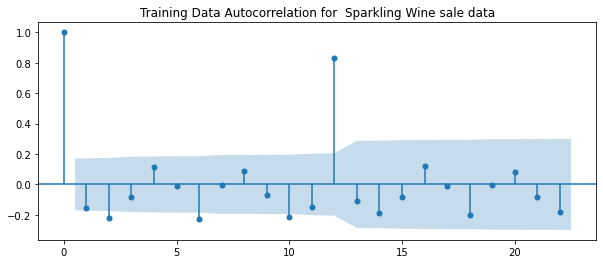

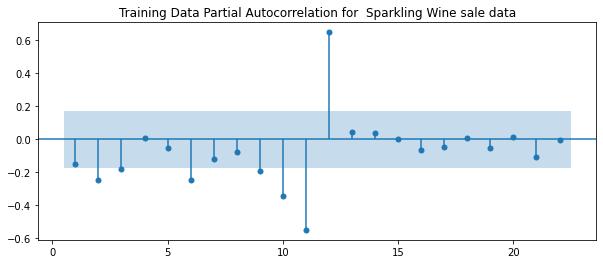

In [98]:
print('Ploting ACF and PACF for  Sparkling Wine sale data')
plot_acf(train_sparkling.diff(),title='Training Data Autocorrelation for  Sparkling Wine sale data',missing='drop')
plot_pacf(train_sparkling.diff().dropna(),title='Training Data Partial Autocorrelation for  Sparkling Wine sale data',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

Ploting ACF and PACF for Rose Wine sale data


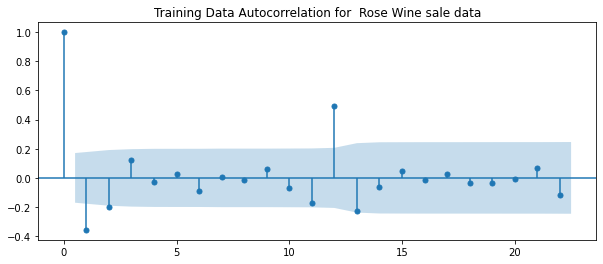

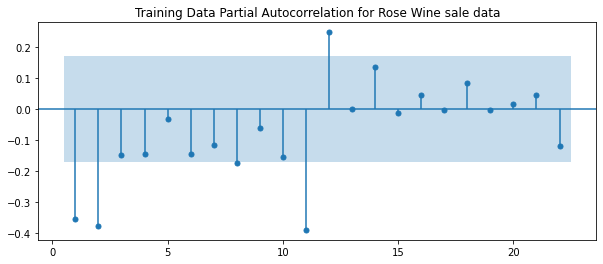

In [99]:
print('Ploting ACF and PACF for Rose Wine sale data')
plot_acf(train_rose.diff(),title='Training Data Autocorrelation for  Rose Wine sale data',missing='drop')
plot_pacf(train_rose.diff().dropna(),title='Training Data Partial Autocorrelation for Rose Wine sale data',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 3.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 3.

By looking at the above plots, we will take the value of p and q to be 3 and 1 respectively.

In [100]:
manual_ARIMA_sparkling = ARIMA(train_sparkling['Sparkling'], order=(1,1,1),freq='M')
results_manual_ARIMA_sparkling = manual_ARIMA_sparkling.fit()
print(results_manual_ARIMA_sparkling.summary())
print('\n')
manual_ARIMA_rose = ARIMA(train_rose['Rose'], order=(2,1,2),freq='M')
results_manual_ARIMA_rose = manual_ARIMA_rose.fit()
print(results_manual_ARIMA_rose.summary())


C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1114.878
Date:                Sun, 20 Mar 2022   AIC                           2235.755
Time:                        23:06:47   BIC                           2244.381
Sample:                    01-31-1980   HQIC                          2239.260
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4494      0.043     10.366      0.000       0.364       0.534
ma.L1         -0.9996      0.102     -9.811      0.000      -1.199      -0.800
sigma2      1.401e+06   7.57e-08   1.85e+13      0.0

Let us analyse the residuals from the various diagnostics plot.

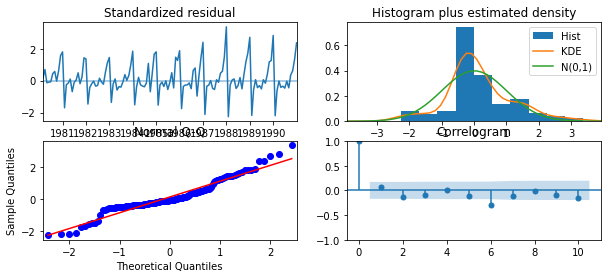

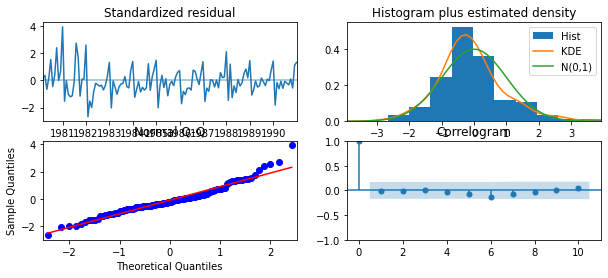

In [101]:
results_manual_ARIMA_sparkling.plot_diagnostics();
results_manual_ARIMA_rose.plot_diagnostics();

#### Predict on the Test Set using this model and evaluate the model.

In [102]:
predicted_manual_ARIMA_sparkling = results_manual_ARIMA_sparkling.forecast(steps=len(test_sparkling))
predicted_manual_ARIMA_rose = results_manual_ARIMA_rose.forecast(steps=len(test_rose))

In [103]:
rmse_arima_acf_pacf_sparkling = mean_squared_error(test_sparkling['Sparkling'],predicted_manual_ARIMA_sparkling,squared=False)
mape_arima_acf_pacf_sparkling = mean_absolute_percentage_error(test_sparkling['Sparkling'],predicted_manual_ARIMA_sparkling)
print('Sparkling wine sale data with Arima with ACF and PACF model, RMSE:',rmse_arima_acf_pacf_sparkling,'\nSparkling wine sale data with Arima with ACF and PACF model, MAPE:',mape_arima_acf_pacf_sparkling)
print('\n')
rmse_arima_acf_pacf_rose = mean_squared_error(test_rose['Rose'],predicted_manual_ARIMA_rose,squared=False)
print('Rose wine sale data with Arima with ACF and PACF model, RMSE:',rmse_arima_acf_pacf_rose)

Sparkling wine sale data with Arima with ACF and PACF model, RMSE: 1319.936733605669 
Sparkling wine sale data with Arima with ACF and PACF model, MAPE: 42.09170393049623


Rose wine sale data with Arima with ACF and PACF model, RMSE: 36.87119661928125


In [104]:
resultsDf_arima_acf_pacf_sparkling = pd.DataFrame({'Test RMSE Sparkling': rmse_arima_acf_pacf_sparkling}
                           ,index=['ARIMA ACF,PACF(1,1,1)'])


resultsDf_sparkling = pd.concat([resultsDf_sparkling,resultsDf_arima_acf_pacf_sparkling])

resultsDf_sparkling

,Test RMSE Sparkling,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739,NaN
"Alpha=1,Beta=0.0189:DES",3850.847815,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160,NaN
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
"ARIMA(2,1,2)",1299.979533,NaN
"SARIMA(3,1,3)(2,0,3,6)",NaN,735.833187
"ARIMA ACF,PACF(1,1,1)",1319.936734,NaN


In [105]:
resultsDf_arima_acf_pacf_rose = pd.DataFrame({'Test RMSE Rose': rmse_arima_acf_pacf_rose}
                           ,index=['ARIMA ACF,PACF(2,1,2)'])


resultsDf_rose = pd.concat([resultsDf_rose,resultsDf_arima_acf_pacf_rose])

resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"ARIMA(2,1,3)",36.815945
"SARIMA(1,1,3)(2,0,3,6)",30.946797
"ARIMA ACF,PACF(2,1,2)",36.871197


### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

Let us look at the ACF and the PACF plots once more.

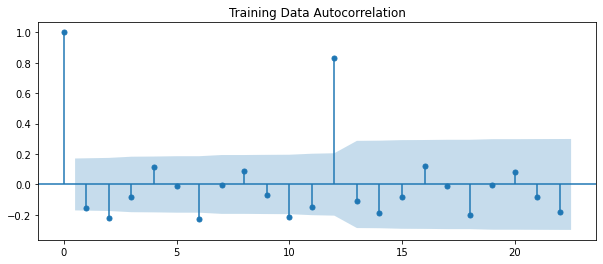

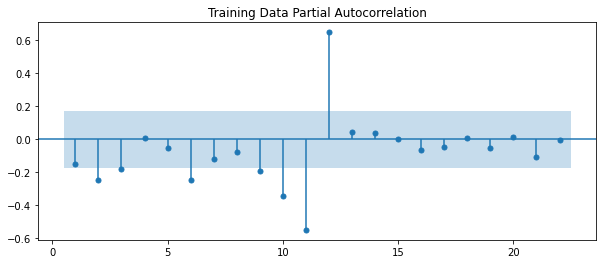

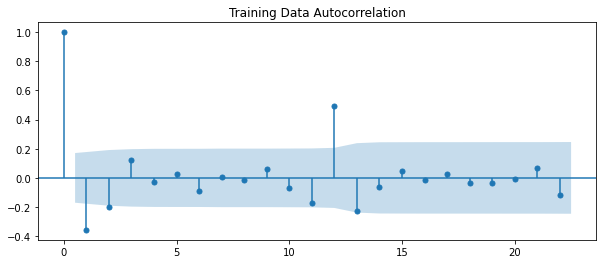

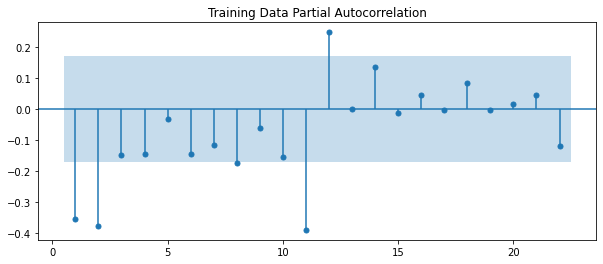

In [106]:
#sparkling Data
plot_acf(train_sparkling.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train_sparkling.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');
#Rose data
plot_acf(train_rose.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train_rose.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 3 or its multiple e.g. 6.
We are taking the p value to be 3 and the q value also to be 3 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 0. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 3.

Remember to check the ACF and the PACF plots only at multiples of 3 (since 3 is the seasonal period).

Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [107]:
import statsmodels.api as sm
# For sparkling

manual_SARIMA_sparkling = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'],
                                order=(1,1,1),
                                seasonal_order=(0, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_sparkling = manual_SARIMA_sparkling.fit(maxiter=1000)
print(results_manual_SARIMA_sparkling.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1099.467
Date:                Sun, 20 Mar 2022   AIC                           2204.934
Time:                        23:06:51   BIC                           2213.513
Sample:                    01-31-1980   HQIC                          2208.420
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4324      0.106      4.074      0.000       0.224       0.640
ma.L1         -0.9865      0.080    -12.291      0.000      -1.144      -0.829
sigma2      1.756e+06   2.14e+05      8.215      0.0

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [108]:
# For Rose

manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train_rose['Rose'],
                                order=(2,1,2),
                                seasonal_order=(0, 0, 0, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -621.955
Date:                Sun, 20 Mar 2022   AIC                           1253.910
Time:                        23:06:52   BIC                           1268.170
Sample:                    01-31-1980   HQIC                          1259.704
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4096      0.491     -0.834      0.405      -1.373       0.553
ar.L2         -0.0222      0.171     -0.130      0.897      -0.358       0.313
ma.L1         -0.3042      0.484     -0.629      0.5

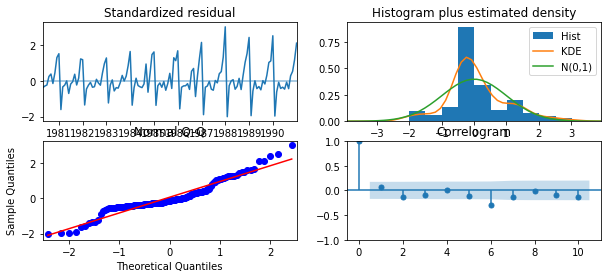

In [109]:
results_manual_SARIMA_sparkling.plot_diagnostics()
plt.show()

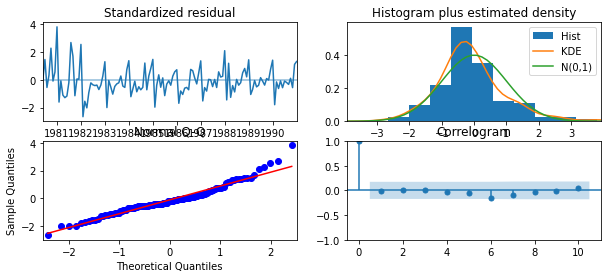

In [110]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [111]:
predicted_SARIMA_acf_pacf_sparkling = results_manual_SARIMA_sparkling.get_forecast(steps=len(test_sparkling))
predicted_SARIMA_acf_pacf_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test_sparkling))

In [112]:
rmse_sarima_acf_pacf_sparkling = mean_squared_error(test_sparkling['Sparkling'],predicted_SARIMA_acf_pacf_sparkling.predicted_mean,squared=False)
print('RMSE:',rmse_sarima_acf_pacf_sparkling)
print('\n')
rmse_sarima_acf_pacf_rose = mean_squared_error(test_rose['Rose'],predicted_SARIMA_acf_pacf_rose.predicted_mean,squared=False)
print('RMSE:',rmse_sarima_acf_pacf_rose)


RMSE: 1325.3363028682475


RMSE: 36.807209578009605


In [113]:
resultsDf_sarima_acf_pacf_sparkling = pd.DataFrame({'Test RMSE Sparkling': [rmse_sarima_acf_pacf_sparkling]}
                           ,index=['SARIMA ACF PACF (1,1,1)(0,0,0,6)'])


resultsDf_sparkling = pd.concat([resultsDf_sparkling, resultsDf_sarima_acf_pacf_sparkling])

resultsDf_sparkling

,Test RMSE Sparkling,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739,NaN
"Alpha=1,Beta=0.0189:DES",3850.847815,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160,NaN
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
"ARIMA(2,1,2)",1299.979533,NaN
"SARIMA(3,1,3)(2,0,3,6)",NaN,735.833187
"ARIMA ACF,PACF(1,1,1)",1319.936734,NaN
"SARIMA ACF PACF (1,1,1)(0,0,0,6)",1325.336303,NaN


In [114]:
resultsDf_sarima_acf_pacf_rose = pd.DataFrame({'Test RMSE Rose': [rmse_sarima_acf_pacf_rose]}
                           ,index=['SARIMA ACF PACF(2,1,2)(0,0,0,6)'])


resultsDf_rose = pd.concat([resultsDf_rose, resultsDf_sarima_acf_pacf_rose])

resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"ARIMA(2,1,3)",36.815945
"SARIMA(1,1,3)(2,0,3,6)",30.946797
"ARIMA ACF,PACF(2,1,2)",36.871197
"SARIMA ACF PACF(2,1,2)(0,0,0,6)",36.807210


This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

# 8. Build a table (create a data frame) with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [115]:
# Dataframe for Sparkling Wine Sale data
resultsDf_sparkling

,Test RMSE Sparkling,Test RMSE Sparkling
"Alpha=0.99,SES",1275.081739,NaN
"Alpha=1,Beta=0.0189:DES",3850.847815,NaN
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",362.754160,NaN
RegressionOnTime,1389.135175,NaN
NaiveModel,3864.279352,NaN
SimpleAverageModel,1275.081804,NaN
"ARIMA(2,1,2)",1299.979533,NaN
"SARIMA(3,1,3)(2,0,3,6)",NaN,735.833187
"ARIMA ACF,PACF(1,1,1)",1319.936734,NaN
"SARIMA ACF PACF (1,1,1)(0,0,0,6)",1325.336303,NaN


In [116]:
# Dataframe for Rose Wine Sale data
resultsDf_rose

,Test RMSE Rose
"Alpha=0.99,SES",36.796244
"Alpha=1,Beta=0.0189:DES",70.572452
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",16.443203
RegressionOnTime,15.268955
NaiveModel,79.718773
SimpleAverageModel,53.460570
"ARIMA(2,1,3)",36.815945
"SARIMA(1,1,3)(2,0,3,6)",30.946797
"ARIMA ACF,PACF(2,1,2)",36.871197
"SARIMA ACF PACF(2,1,2)(0,0,0,6)",36.807210


# 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

### Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

#### Holt-Winters - ETS(A, A, A) - Holt Winter's linear method with additive errors is the most optimum

In [117]:
#I nitializing the Double Exponential Smoothing Model for sparkling wine sale data
model_TES_sparkling = ExponentialSmoothing(df_sparkling,trend='additive',seasonal='additive')
# Fitting the model
model_TES_sparkling = model_TES_sparkling.fit()
print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==')
print('')
print(model_TES_sparkling.params)

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub
C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:744: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters for sparkling wine sale data ==

{'smoothing_level': 0.05263157894736842, 'smoothing_slope': 0.05263157894736842, 'smoothing_seasonal': 0.3684210526315789, 'damping_slope': nan, 'initial_level': 1580.0, 'initial_slope': 0.01, 'initial_seasons': array([ 106.,   11.,  724.,  132., -109., -203.,  386.,  873.,  404.,
       1016., 2507., 3599.]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [118]:
# Forecasting using this model for the duration of the test set(Sparkling Wine sale data)
TES_predict_sparkling =  model_TES_sparkling.forecast(len(test_sparkling))
TES_predict_sparkling

C:\Users\Sankara Rao\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:342: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


1995-08-31    1884.976769
1995-09-30    2402.258496
1995-10-31    3245.977232
1995-11-30    3932.213204
1995-12-31    6119.724082
1996-01-31    1266.116913
1996-02-29    1583.646638
1996-03-31    1821.829048
1996-04-30    1795.729426
1996-05-31    1643.054809
1996-06-30    1576.941975
1996-07-31    1975.093831
1996-08-31    1862.874162
1996-09-30    2380.155890
1996-10-31    3223.874626
1996-11-30    3910.110597
1996-12-31    6097.621475
1997-01-31    1244.014306
1997-02-28    1561.544032
1997-03-31    1799.726442
1997-04-30    1773.626819
1997-05-31    1620.952203
1997-06-30    1554.839369
1997-07-31    1952.991225
1997-08-31    1840.771556
1997-09-30    2358.053283
1997-10-31    3201.772019
1997-11-30    3888.007990
1997-12-31    6075.518869
1998-01-31    1221.911700
1998-02-28    1539.441425
1998-03-31    1777.623835
1998-04-30    1751.524213
1998-05-31    1598.849596
1998-06-30    1532.736762
1998-07-31    1930.888618
1998-08-31    1818.668949
1998-09-30    2335.950677
1998-10-31  

## Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [129]:
predicted_TES_predict_sparkling = TES_predict_sparkling.get_forecast(steps=12)

AttributeError: 'Series' object has no attribute 'get_forecast'

In [ ]:
predicted_TES_predict_sparkling_date = predicted_TES_predict_sparkling.summary_frame(alpha=0.05)
predicted_TES_predict_sparkling_date.head()

In [ ]:
rmse = mean_squared_error(df['Sales_quantity'],predicted_TES_predict_sparkling_date.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

In [ ]:
axis = df_sparkling['Sparkling'].plot(label='Observed')
predicted_TES_predict_sparkling_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();

10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

# END